# Exercício 1



A base Reviews.csv possui avaliações de produtos comprados numa grande empresa de e-commerce no Brasil. Além de informações categóricas, a base possui o campo ```review_text```, com o texto da avaliação, e o campo ```overall_rating```, com a nota dada pelo usuário para determinado produto. Crie um modelo para prever a nota da avaliação do cliente a partir do texto.

Etapas sugeridas:

1 - Faça a divisão da base de teste com pelo menos 20% das amostras (sugestão: out-of-time);

2 - Verifique a existência de dados duplicados ou faltantes;

3 - Crie uma nuvem de palavras para cada nota de avaliação; Verifique a variação das notas ao longo do tempo; 

4 - Crie uma representação para a sua coluna de texto. Você pode tentar Bag Of Words, TF-IDF ou o Word2Vec;

5 - Faça o treinamento do modelo. Você pode utilizar uma busca de hiperparâmetros para otimizar seus resultados;

6 - Aplique seu modelo na base de teste para obter seu resultado.

Desafios:

1 - Faça um modelo considerando as demais variáveis no processo;

------

# 1. Divisão da base de teste

In [1]:
import pandas as pd

In [9]:
df = pd.read_csv('Reviews.csv')

print(df.shape)

df.head()

(132373, 14)


/Users/helder/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


In [13]:
from sklearn.model_selection import train_test_split

In [17]:
df['submission_date'] = pd.to_datetime(df['submission_date'])

In [18]:
# out-of-sample

df_experimento, df_teste = train_test_split(df, test_size=.3)

print(df_experimento.shape, df_teste.shape)

(92661, 14) (39712, 14)


In [146]:
# out-of-time

df_experimento = df[df['submission_date'] < pd.to_datetime('2018-05-01')]

df_teste = df[df['submission_date'] >= pd.to_datetime('2018-05-01')]

print(f'{len(df_teste)/len(df):.2f}')

print(df_experimento.shape, df_teste.shape)

0.20
(105939, 14) (26434, 14)


In [6]:
df['overall_rating'].value_counts(dropna=False)

5    47955
4    32345
1    27369
3    16315
2     8389
Name: overall_rating, dtype: int64

## Stem

In [26]:
# Natural Language Tool Kit
import nltk

nltk.download('rslp')

[nltk_data] Downloading package rslp to /Users/helder/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [69]:
from nltk.stem import RSLPStemmer

In [70]:
st = RSLPStemmer()

In [76]:
# Processa PALAVRAS

st.stem('ela')

'ela'

# 2. Análise da consistência dos dados

## 2.1 Dados faltantes

In [52]:
import missingno as msno

<AxesSubplot:>

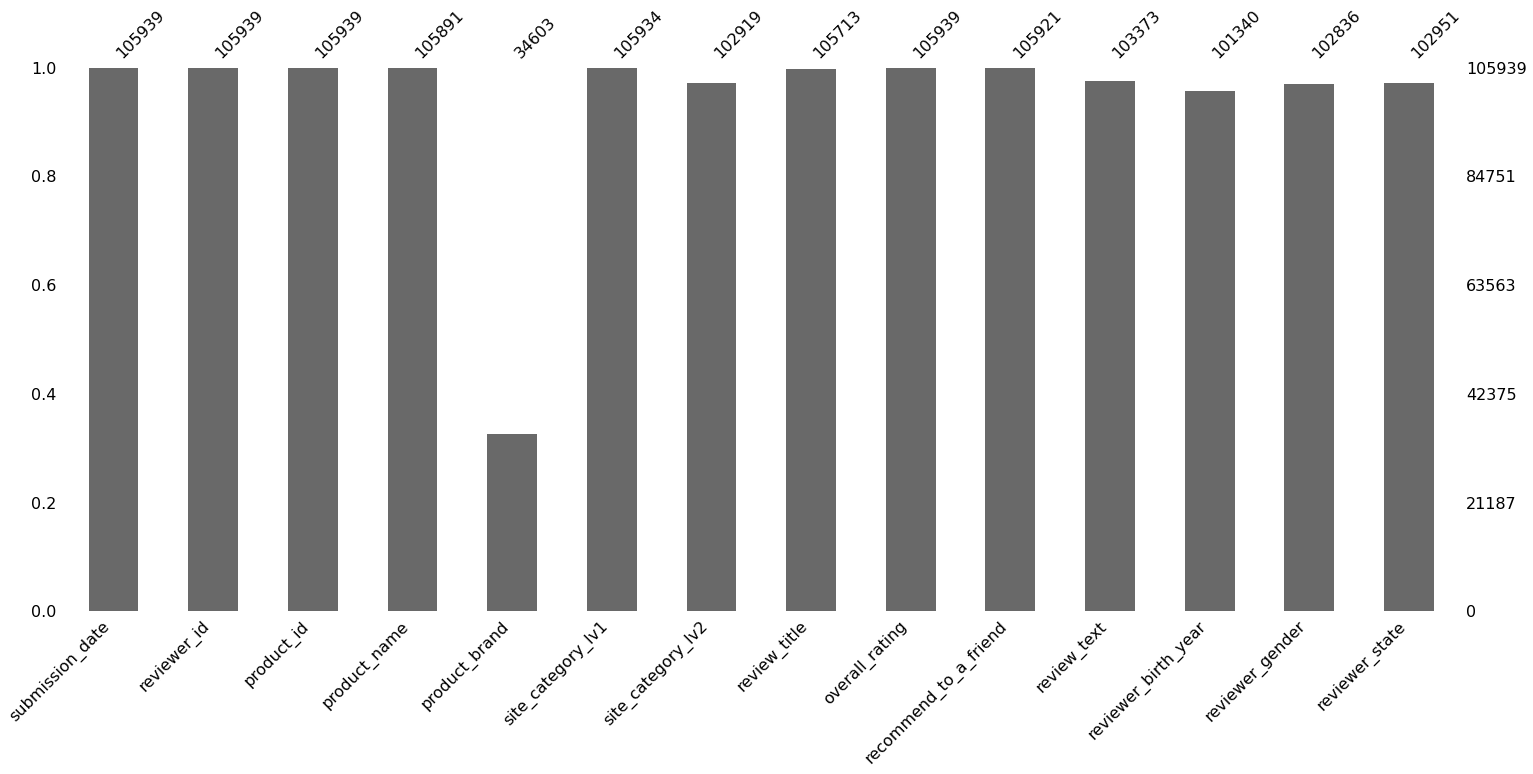

In [44]:
msno.bar(df_experimento)

<AxesSubplot:>

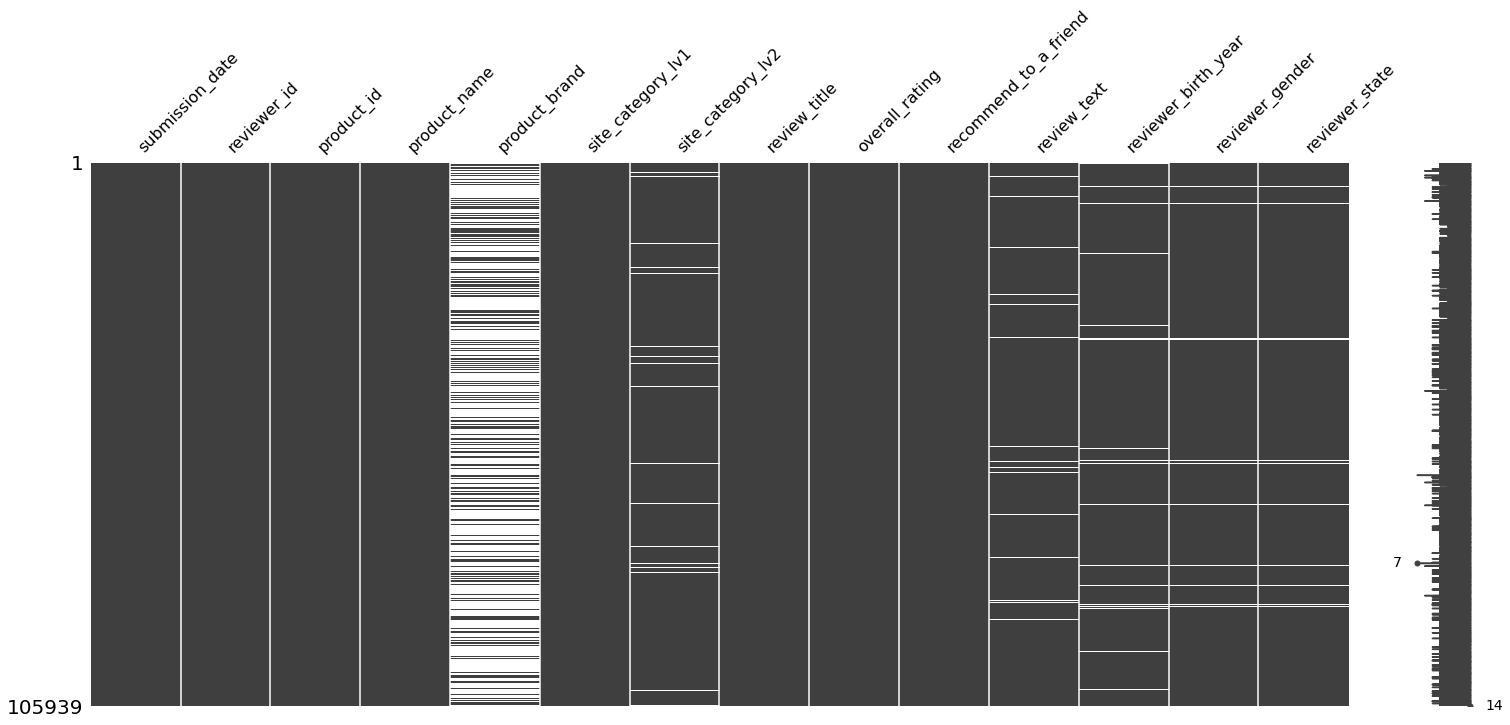

In [45]:
msno.matrix(df_experimento)

<AxesSubplot:>

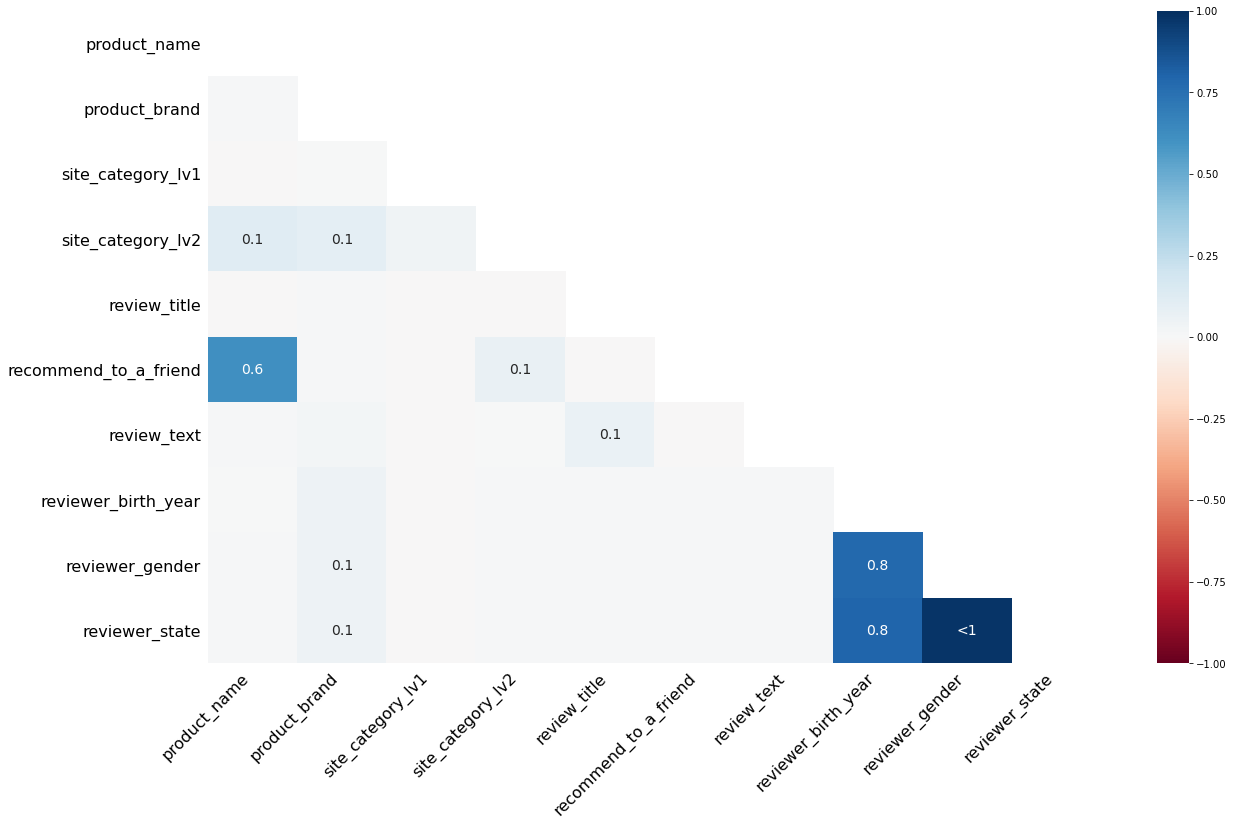

In [47]:
msno.heatmap(df_experimento)

In [48]:
def limpa_faltantes(df):
    df = df.dropna(subset=['review_text', 'overall_rating'])
    
    return df

In [147]:
df_experimento = limpa_faltantes(df_experimento)

<AxesSubplot:>

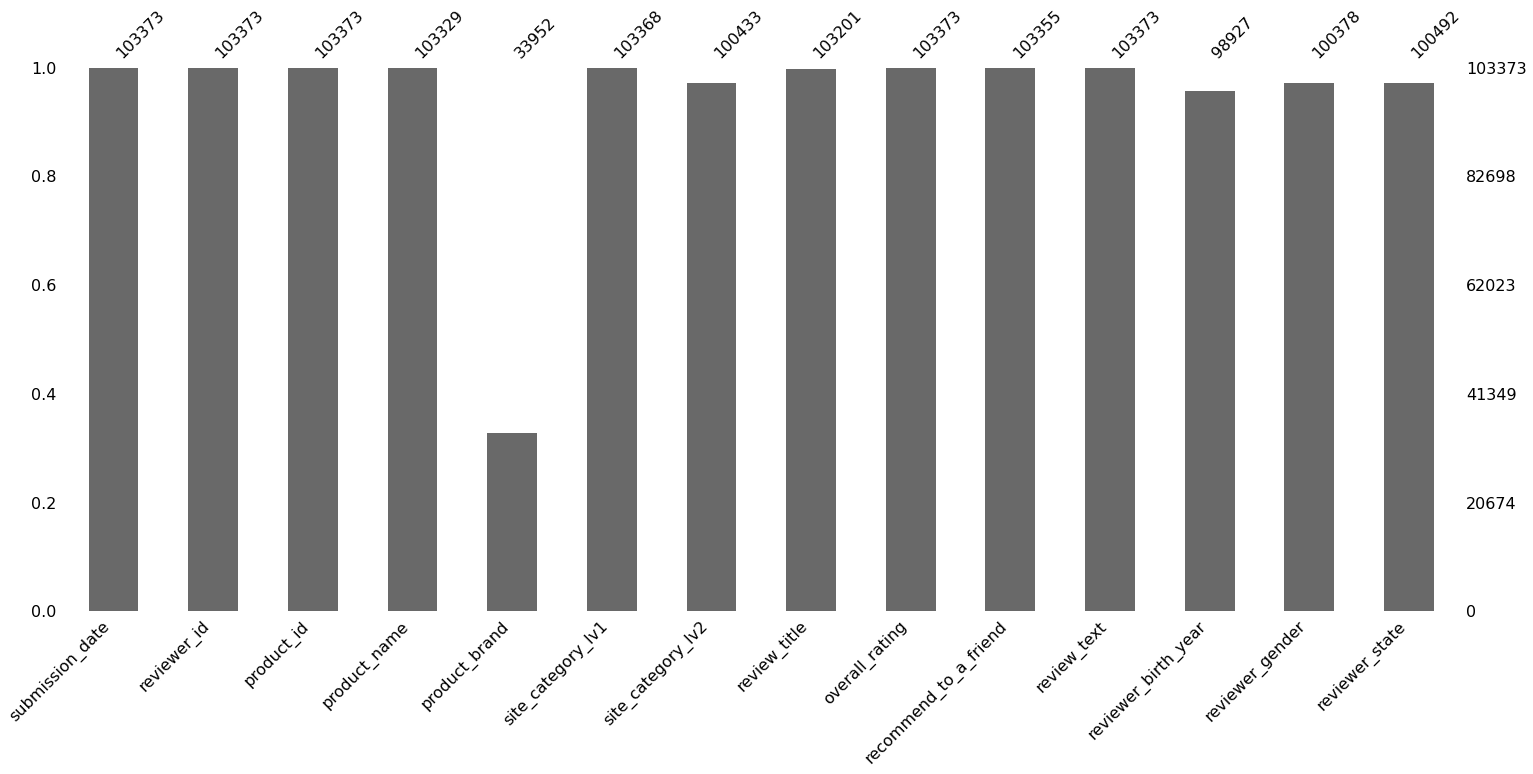

In [53]:
msno.bar(df_experimento)

## 2.2 Dados duplicados

Considero todas as colunas pois elas trazem informação relevante para saber se a avaliação é exatamente a mesma!

In [149]:
SUBSET_DUPLICADOS

['product_id',
 'product_name',
 'product_brand',
 'site_category_lv1',
 'site_category_lv2',
 'review_title',
 'overall_rating',
 'recommend_to_a_friend',
 'review_text',
 'reviewer_birth_year',
 'reviewer_gender',
 'reviewer_state']

In [153]:
SUBSET_DUPLICADOS = df_experimento.drop(['submission_date', 'reviewer_id'], axis=1).columns.to_list()

num_duplicados = df_experimento.duplicated(subset=SUBSET_DUPLICADOS).sum()

print(f'{num_duplicados} linhas duplicadas em {len(df_experimento)} registros')

230 linhas duplicadas em 103373 registros


In [154]:
df_experimento = df_experimento.drop_duplicates(subset=SUBSET_DUPLICADOS)

print(df_experimento.shape, f'{df_experimento.duplicated(subset=SUBSET_DUPLICADOS).sum()}')

(103143, 14) 0


# 3. Análise exploratória

## 3.1 Funções úteis

In [61]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(texts):
    plt.figure(figsize=(10, 10))
    text = ' '.join(texts.tolist())
    WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5)
    words = WC.generate(text)
    plt.imshow(words, interpolation='bilinear')
    plt.show()

## 3.2 Wordcloud

###### 1

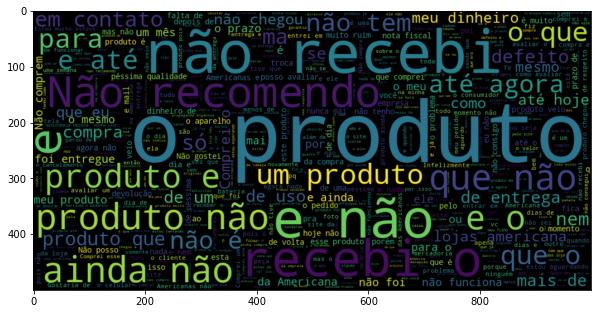

In [64]:
plot_wordcloud(df_experimento.loc[df_experimento['overall_rating'] == 1, 'review_text'])

###### 2

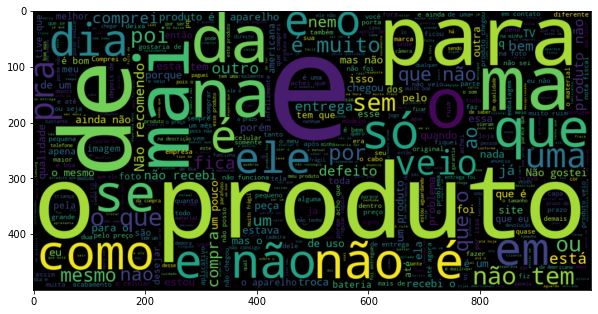

In [65]:
plot_wordcloud(df_experimento.loc[df_experimento['overall_rating'] == 2, 'review_text'])

###### 3

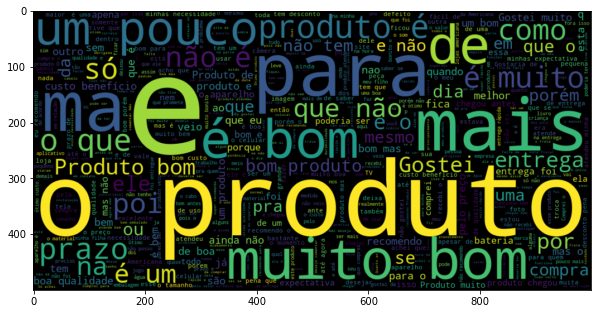

In [66]:
plot_wordcloud(df_experimento.loc[df_experimento['overall_rating'] == 3, 'review_text'])

###### 4

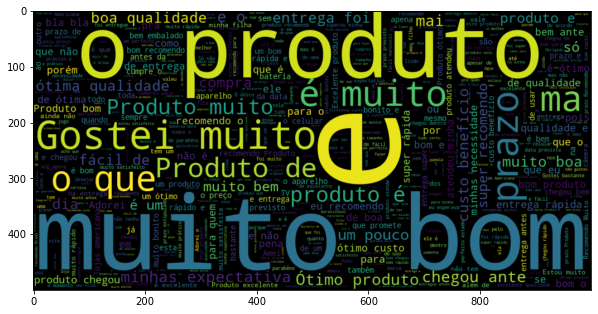

In [67]:
plot_wordcloud(df_experimento.loc[df_experimento['overall_rating'] == 4, 'review_text'])

###### 5

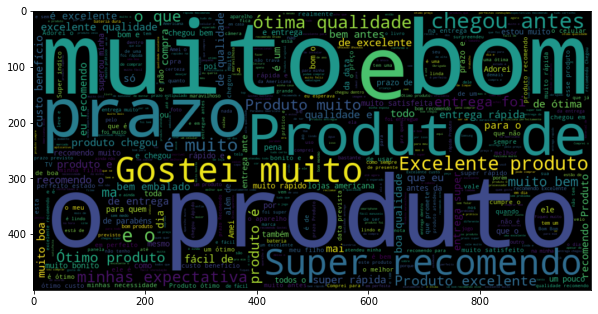

In [68]:
plot_wordcloud(df_experimento.loc[df_experimento['overall_rating'] == 5, 'review_text'])

## 3.3 Análise temporal

In [162]:
df_experimento['anomesdia'] = df_experimento['submission_date'].dt.strftime('%Y%m%d')

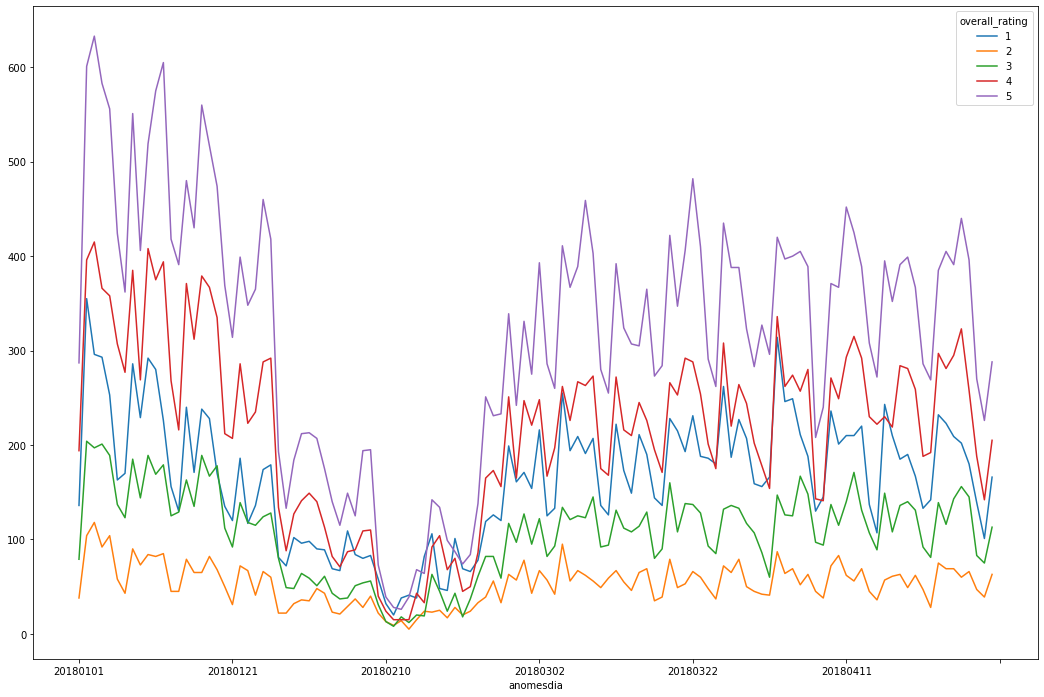

In [168]:
from matplotlib import pyplot as plt

df_historico = df_experimento.groupby(['anomesdia', 'overall_rating'])[['submission_date']].count().reset_index()

pivot = pd.pivot_table(df_historico, values='submission_date', index='anomesdia', columns='overall_rating').fillna(0)

pivot.plot(figsize=(18, 12))

plt.show()

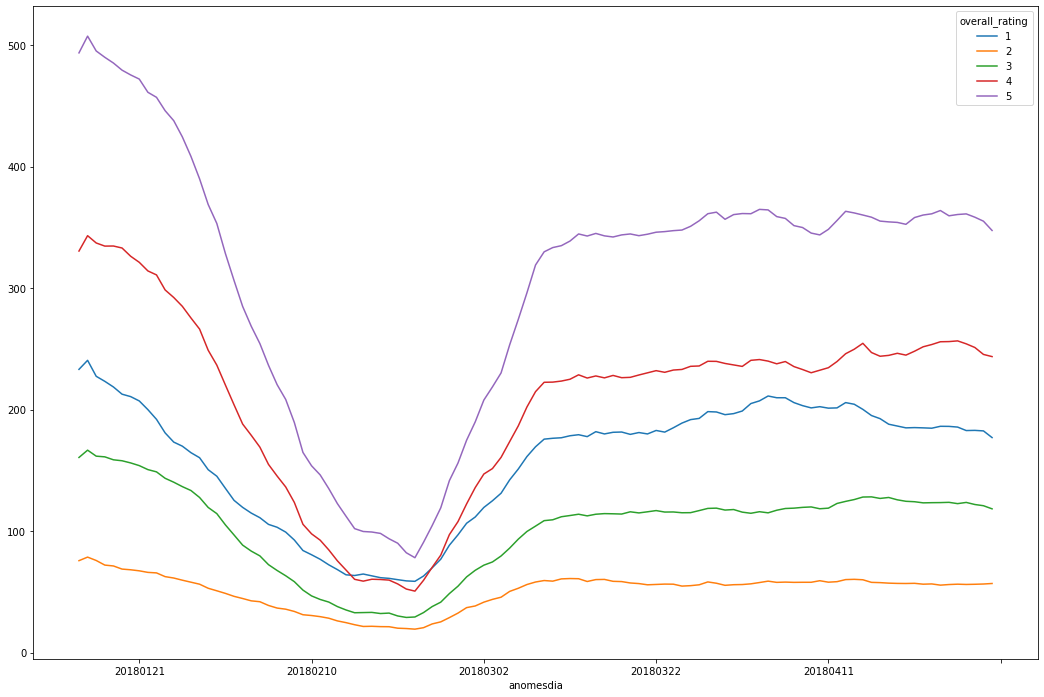

In [169]:
for coluna in pivot.columns:
    pivot[coluna] = pivot[coluna].rolling(14).mean()
    
pivot.plot(figsize=(18, 12))

plt.show()

# 4. Criando as representações

In [113]:
from sklearn.model_selection import train_test_split

## 4.1 Base de validação

In [116]:
X = df_experimento['review_text']
y = df_experimento['overall_rating']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(82570,) (82570,)
(20643,) (20643,)


## 4.2.1 Representação Bag Of Words

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=8000)

vectorizer.fit(X_train)

CountVectorizer(max_features=8000)

In [120]:
X_train_transformed = vectorizer.transform(X_train).toarray()

print(X_train_transformed.shape)

X_valid_transformed = vectorizer.transform(X_valid).toarray()

print(X_valid_transformed.shape)

(82570, 8000)
(20643, 8000)


## 4.2.2 Representação TF-IDF

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer(max_features=8000)

vectorizer.fit(X_train)

CountVectorizer(max_features=8000)

In [158]:
X_train_transformed = vectorizer.transform(X_train).toarray()

print(X_train_transformed.shape)

X_valid_transformed = vectorizer.transform(X_valid).toarray()

print(X_valid_transformed.shape)

(82570, 8000)
(20643, 8000)


## 4.2.3 Representação Word2Vec

# 5. Modelo

## 5.1 Funções úteis

In [172]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


def score_modelo(y_train, y_train_pred, y_valid, y_valid_pred):

    acc_train = accuracy_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred, average='macro')

    acc_valid = accuracy_score(y_valid, y_valid_pred)
    f1_valid = f1_score(y_valid, y_valid_pred, average='macro')

    print(f'Treino:\nAcc: {acc_train:.2f}, F1: {f1_train:.2f}')
    print(f'Validação:\nAcc: {acc_valid:.2f}, F1: {f1_valid:.2f}')
    
def plot_cm(y, y_pred, names):
    
    cm = confusion_matrix(y, y_pred)

    fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=names)

    fig.set_size_inches(12, 12)

    plt.show()

## 5.2 Treinamento

In [159]:
from sklearn.naive_bayes import MultinomialNB

In [160]:
modelo = MultinomialNB()

In [161]:
modelo.fit(X_train_transformed, y_train)

MultinomialNB()

## 5.3 Avaliação

In [175]:
y_train_pred = modelo.predict(X_train_transformed)

y_valid_pred = modelo.predict(X_valid_transformed)

print(y_train_pred.shape, y_valid_pred.shape)

(82570,) (20643,)


In [176]:
score_modelo(y_train, y_train_pred, y_valid, y_valid_pred)

Treino:
Acc: 0.60, F1: 0.54
Validação:
Acc: 0.56, F1: 0.48


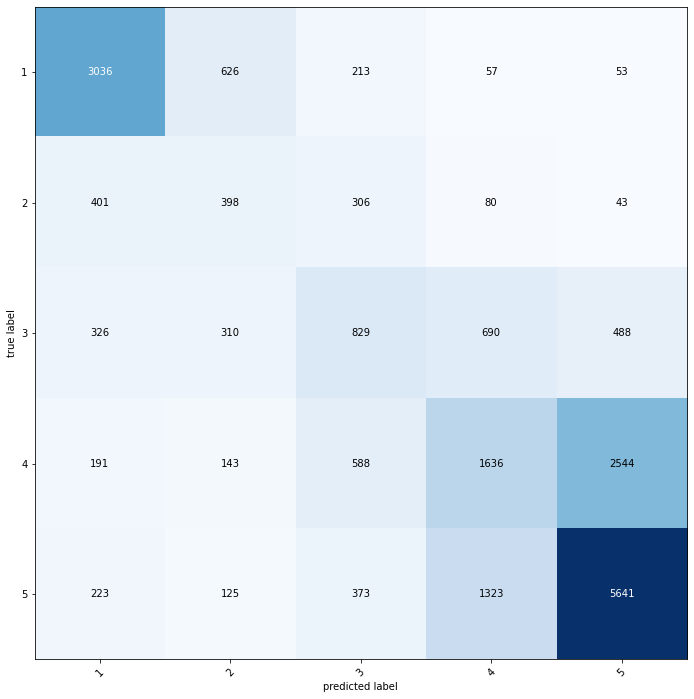

In [177]:
plot_cm(y_valid, y_valid_pred, modelo.classes_)

# 6. Inferência na base de teste